## Advanced Lane Finding

Brian Erickson

### Abstract
This project aims to find the position of a car in the lane along with the curvature of the road by using advanced lane line finding tecniques.  This is an extension of the earlier lane finding project.  My work for that project is at https://github.com/berickson/CarND-LaneLines-P1 and you can view the notebook at http://nbviewer.jupyter.org/github/berickson/CarND-LaneLines-P1/blob/master/P1.ipynb.  This is all imlemented as part of the Udacity Self Driving Car Nanodegree.


#### Imports and Helper Functions

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import os
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import glob
%matplotlib inline

#### Goal: Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [2]:
def get_calibration(show_annoted = False, show_corrected = False):
    w=9
    h=6
    pattern_size = (w,h)

    # termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    single_object_points = np.zeros((w*h,3), np.float32)
    single_object_points[:,:2] = np.mgrid[0:w,0:h].T.reshape(-1,2)

    all_object_points = []
    all_image_points = []
    im_shape = None

    for image_path in glob.glob('camera_cal/calibration*.jpg'):
        im = plt.imread(image_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
        if im_shape == None:
            im_shape = im_gray.shape[::-1]
        found,corners = cv2.findChessboardCorners(im,(9,6),None)
        if found==False: 
            continue
        corners2 = cv2.cornerSubPix(im_gray,corners,(11,11),(-1,-1),criteria)
        all_image_points.append(corners2)
        all_object_points.append(single_object_points)
        if show_annoted:
            plt.figure()
            im_annoted = cv2.drawChessboardCorners(im, pattern_size, corners2, found)
            plt.imshow(im_annoted)

    ret, mtx, dst, rvecs, tvecs = cv2.calibrateCamera(all_object_points, all_image_points, im_shape,None,None)
    if show_corrected:
        for image_path in glob.glob('camera_cal/calibration*.jpg'):
            im = plt.imread(image_path)   
            plt.figure()
            plt.imshow(cv2.undistort(im,mtx,dst))
    return mtx,dst


In [3]:
def undistort(im,mtx,dst,plot=False):
    return cv2.undistort(im,mtx,dst)

In [4]:
mtx,dst=get_calibration()

#### Goal: Apply a distortion correction to raw images

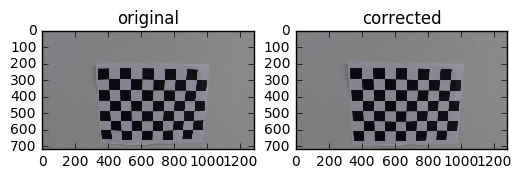

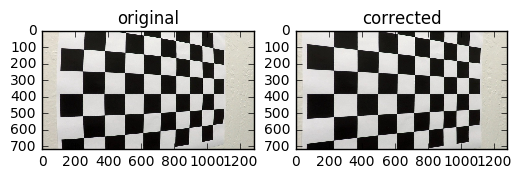

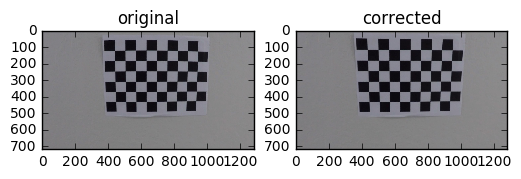

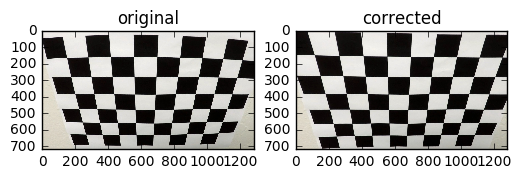

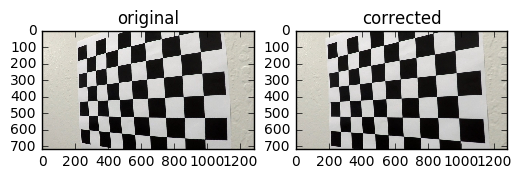

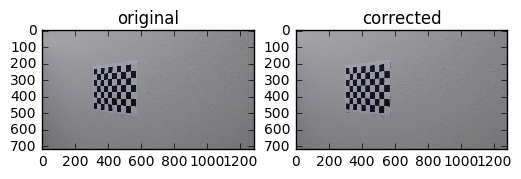

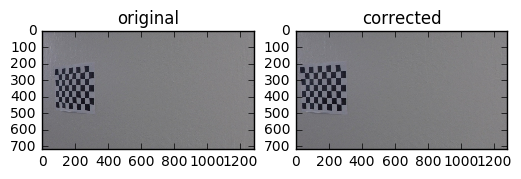

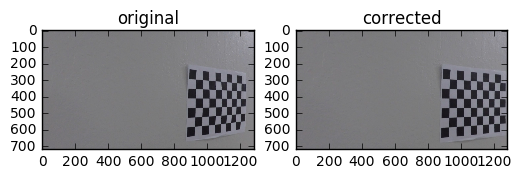

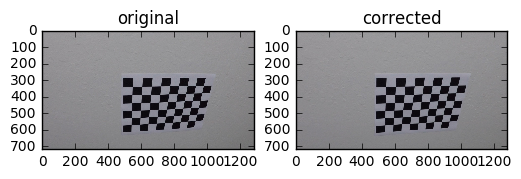

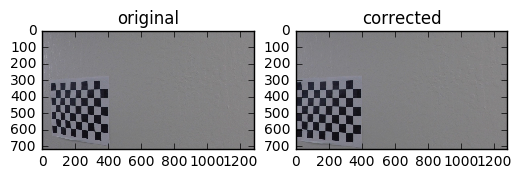

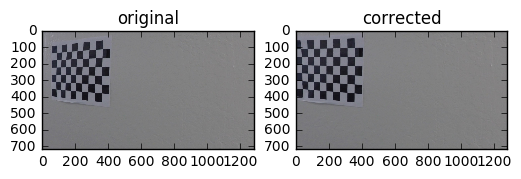

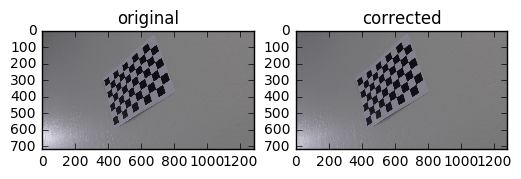

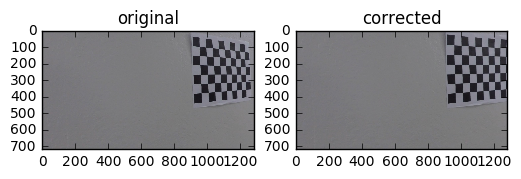

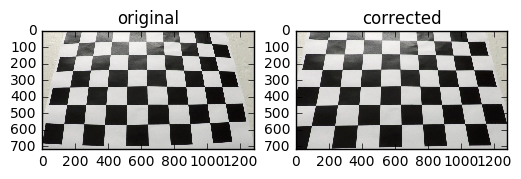

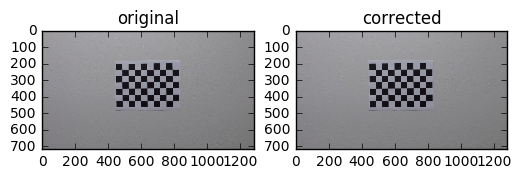

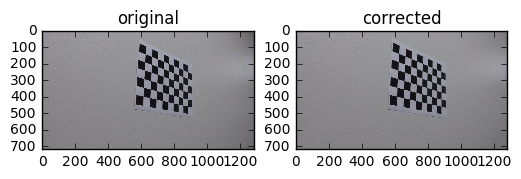

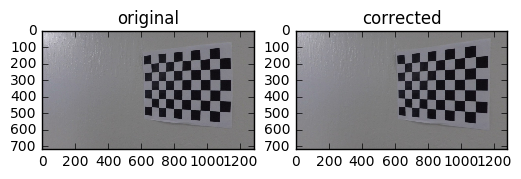

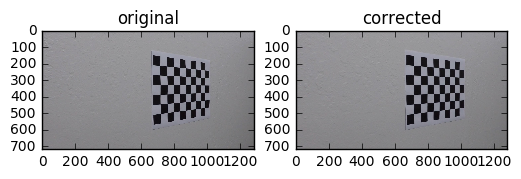

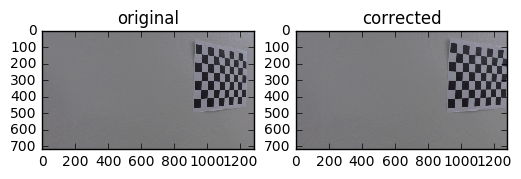

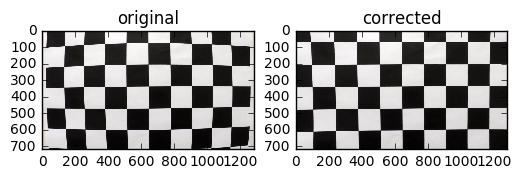

In [5]:
for image_path in glob.glob('camera_cal/calibration*.jpg'):
    im = plt.imread(image_path)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(im)
    plt.title("original")
    plt.subplot(1,2,2)
    plt.imshow(undistort(im,mtx,dst))
    plt.title("corrected")

In [6]:
def get_filename(path):
    '''
    returns the filename part of path, without extension
    '''
    return os.path.basename(path).split(".")[0]
    
get_filename('/abc/myfile.ab')

'myfile'

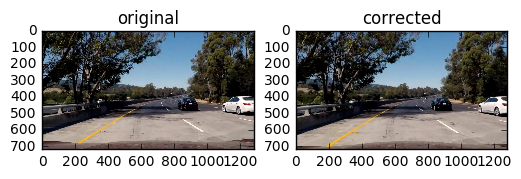

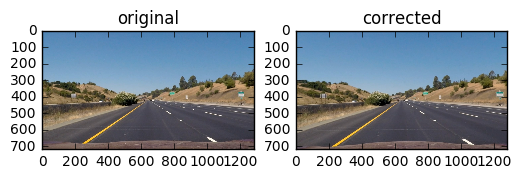

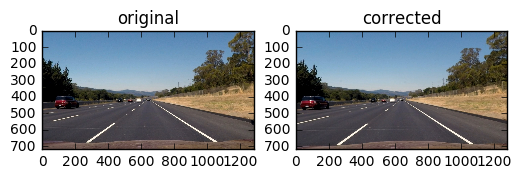

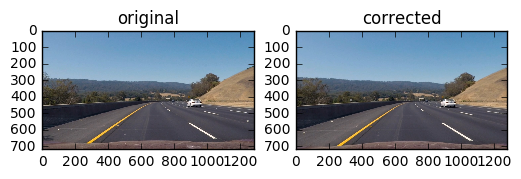

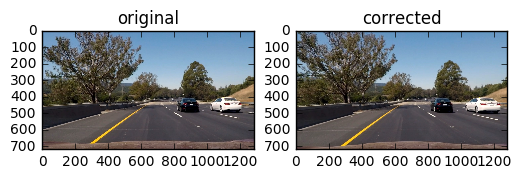

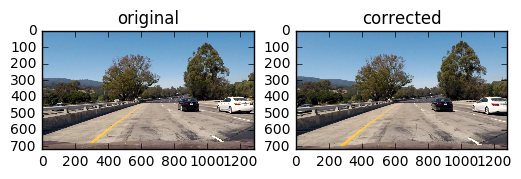

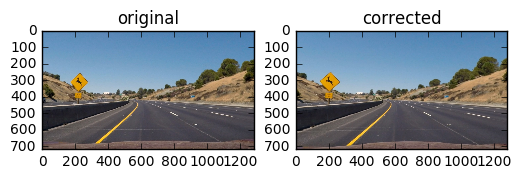

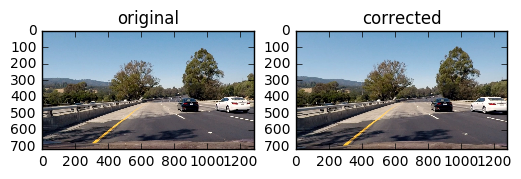

In [7]:
mtx,dst=get_calibration()
for image_path in glob.glob('test_images/*.jpg'):
    im = plt.imread(image_path)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(im)
    plt.title("original")
    plt.subplot(1,2,2)
    im_undistorted = undistort(im,mtx,dst)
    plt.imshow(im_undistorted)
    out_path = 'output_images/undistorted_'+get_filename(image_path)+'.jpg'
    plt.imsave(out_path, im_undistorted)
    plt.title("corrected")

#### Goal: Use color transforms, gradients, etc., to create a thresholded binary image

#### Goal: Apply a perspective transform to rectify binary image ("birds-eye view")

The Interstate Highway standards for the U.S. Interstate Highway System uses a 12-foot (3.7 m) standard for lane width
http://www.dot.ca.gov/trafficops/camutcd/docs/TMChapter6.pdf p.31

3.66m marking, 11m between, dot between

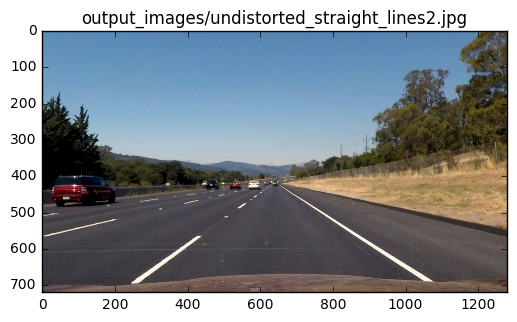

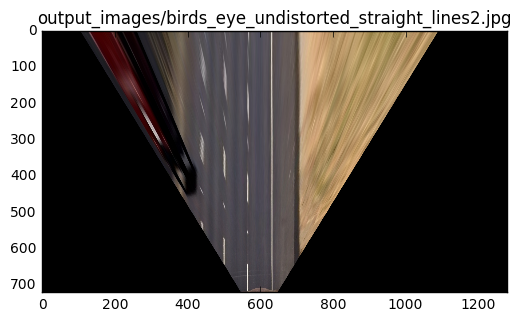

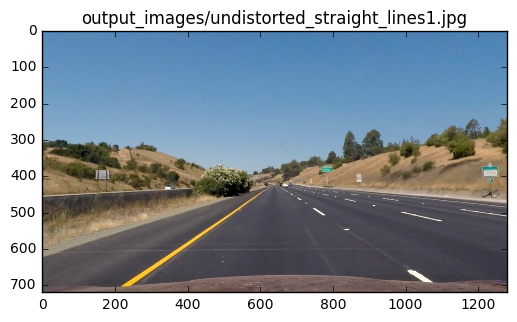

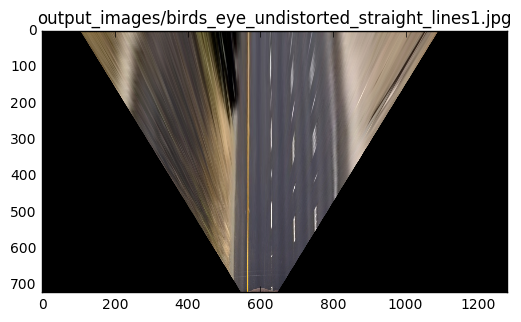

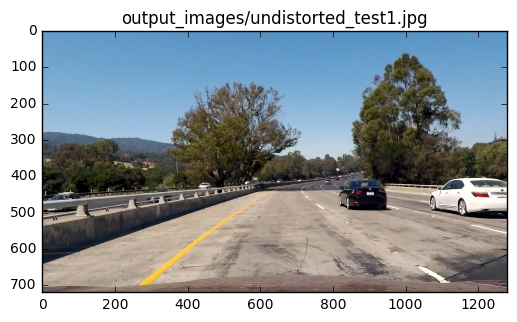

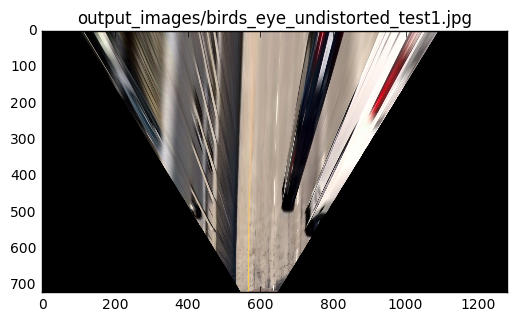

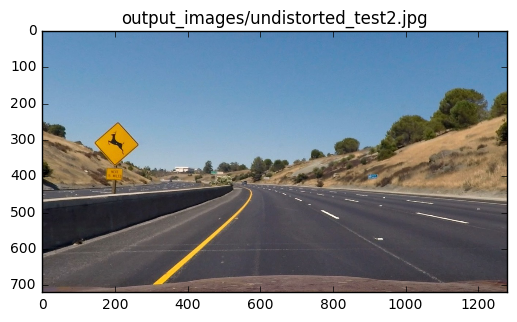

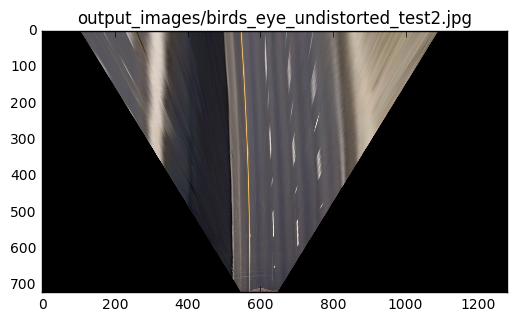

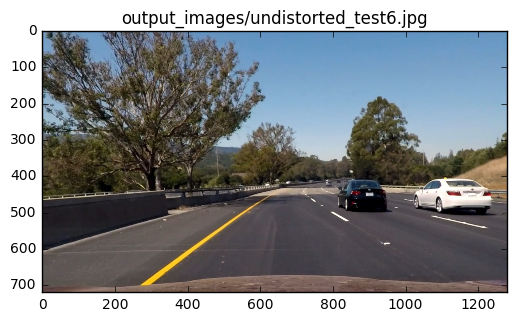

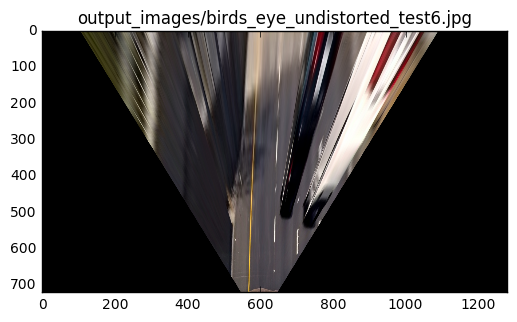

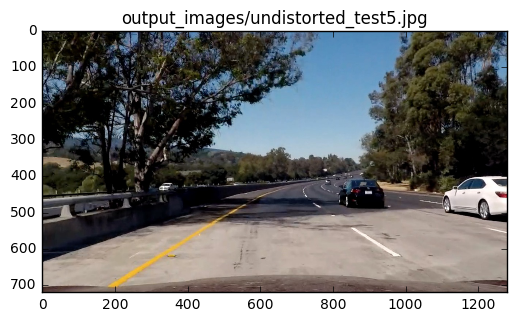

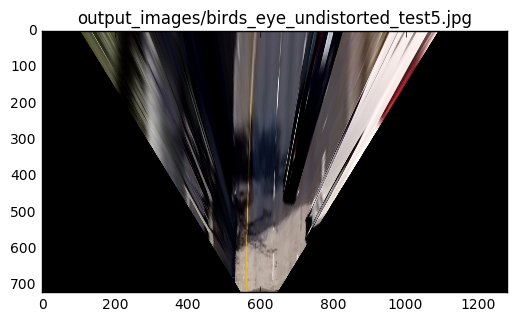

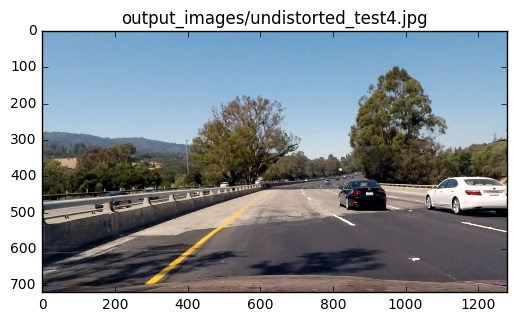

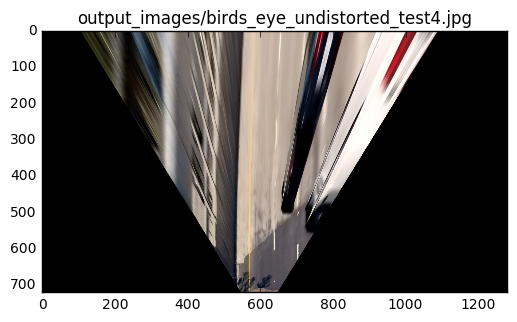

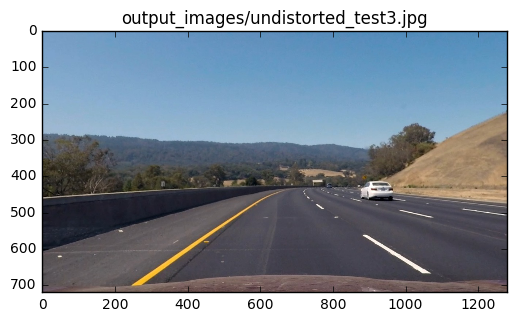

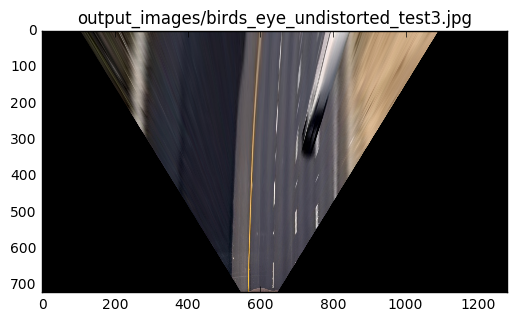

In [8]:
def birds_eye(im,flags=cv2.INTER_LINEAR):
    im_shape = (im.shape[1],im.shape[0]) # im_shape (1280, 720)
    # polygons to warp based on eyeballing lanes in Gimp
    src = np.array([(270,675),(615,434),(666,434),(1050,675)],dtype=np.float32)
    #for p in src:
    #    plt.plot(p[0],p[1],'.')
    dst = np.array([(270,710),(270,-600),(1050,-600),(1050,710)],dtype=np.float32)
    dst[:,0] = 0.08805 * dst[:,0] + 540 # constant makes lane width to marker spacing ratio correct
    transform = cv2.getPerspectiveTransform(src, dst)
    return cv2.warpPerspective(im,transform,im_shape)

for im_path in glob.glob('output_images/undistorted_*.jpg'):
    plt.figure()
    im=plt.imread(im_path)
    plt.figure()
    plt.imshow(im)
    plt.title(im_path)
    plt.figure()
    im_bird = birds_eye(im)
    plt.imshow(im_bird)
    out_path = 'output_images/birds_eye_'+get_filename(im_path)+'.jpg'
    plt.title(out_path)
    plt.imsave(out_path, im_bird)


In [9]:
input_videos = ["project_video.mp4", "challenge_video.mp4", "harder_challenge_video.mp4"]
for input_video in input_videos:
    ##### Make some clips to demonstrate birds eye
    clip1 = VideoFileClip(input_video)
    white_clip = clip1.fl_image(birds_eye) #NOTE: this function expects color images!!
    %time white_clip.write_videofile("output_videos/birds_eye_"+input_video, audio=False)

[MoviePy] >>>> Building video output_videos/birds_eye_project_video.mp4
[MoviePy] Writing video output_videos/birds_eye_project_video.mp4


100%|█████████▉| 1260/1261 [00:33<00:00, 37.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/birds_eye_project_video.mp4 

CPU times: user 53.3 s, sys: 3.2 s, total: 56.5 s
Wall time: 34.4 s
[MoviePy] >>>> Building video output_videos/birds_eye_challenge_video.mp4
[MoviePy] Writing video output_videos/birds_eye_challenge_video.mp4


100%|██████████| 485/485 [00:12<00:00, 38.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/birds_eye_challenge_video.mp4 

CPU times: user 21.1 s, sys: 1.31 s, total: 22.4 s
Wall time: 13.3 s
[MoviePy] >>>> Building video output_videos/birds_eye_harder_challenge_video.mp4
[MoviePy] Writing video output_videos/birds_eye_harder_challenge_video.mp4


100%|█████████▉| 1199/1200 [00:34<00:00, 34.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/birds_eye_harder_challenge_video.mp4 

CPU times: user 50.5 s, sys: 3.04 s, total: 53.6 s
Wall time: 35.6 s


#### Goal: Detect lane pixels and fit to find the lane boundary

#### Goal: Determine the curvature of the lane and vehicle position with respect to center.

#### Goal: Warp the detected lane boundaries back onto the original image.

#### Goal: Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position